**## Table of Content**

**1.Initialize**

1.1 Necessary imports

**2.The Dataset** 

**3.Preparing the Data**

3.1 Data Augmentation

3.2 Loading the images

**4.Convolutional Neural Network**

4.1 CNN Architecture

4.2 Fit the model

**5.Evaluate**

# Importing the packages and data

In this stage we are performing the below tasks

1.Import packages.

2.Imported data using google drive.

Importing the packages and data

In [ ]:
import tensorflow as tf 
import numpy as np
import pandas as pd

from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline


from sklearn.metrics import classification_report,confusion_matrix

from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')
start_time = datetime.now()

In [ ]:
#Importing the data using Google Drive
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


# **Importing the data using ImageDataGenerator**

### **Data Augmentation**

We will increase the size of the image training dataset artificially by performing some Image Augmentation technique.

"Image Augmentation expands the size of the dataset by creating a modified version of the existing training set images that helps to increase dataset variation and ultimately improve the ability of the model to predict new images".

### **Loading the Images**

The Image Data Generator has a class known as flow from directory to read the images from folders containing images. Returns the DirectoryIterator

In [ ]:
# Importing the data from the ‘train’, ‘val’, and ‘test’ folders using ImageDataGenerator
train_path = '/content/drive/My Drive/Colab Notebooks/train'
test_path = '/content/drive/My Drive/Colab Notebooks/test'
val_path = '/content/drive/My Drive/Colab Notebooks/val'

In [ ]:
train_gen = ImageDataGenerator(rescale = 1./255,
 shear_range = 0.2,
 zoom_range = 0.2,
 vertical_flip = True)

val_gen = ImageDataGenerator(rescale = 1./255)

train_set = train_gen.flow_from_directory('train',target_size = (512,512),batch_size = 32,class_mode = 'binary',color_mode = 'grayscale')

val_set = val_gen.flow_from_directory('val',target_size = (512,512),batch_size = 32,class_mode = 'binary',color_mode = 'grayscale')
 
test_gen = ImageDataGenerator(rescale = 1./255)

test_set = test_gen.flow_from_directory('test',target_size = (512,512),batch_size = 32,class_mode = None,color_mode = 'grayscale',shuffle=False)

Found 4192 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


**Total number of observations (images):**

Training observations: 4,192 (Belongingto 2 classes)

Validation observations: 1,040 (Belongingto 2 classes)

Testing observations: 624 (Belongingto 2 classes)

# **Displaying the images**

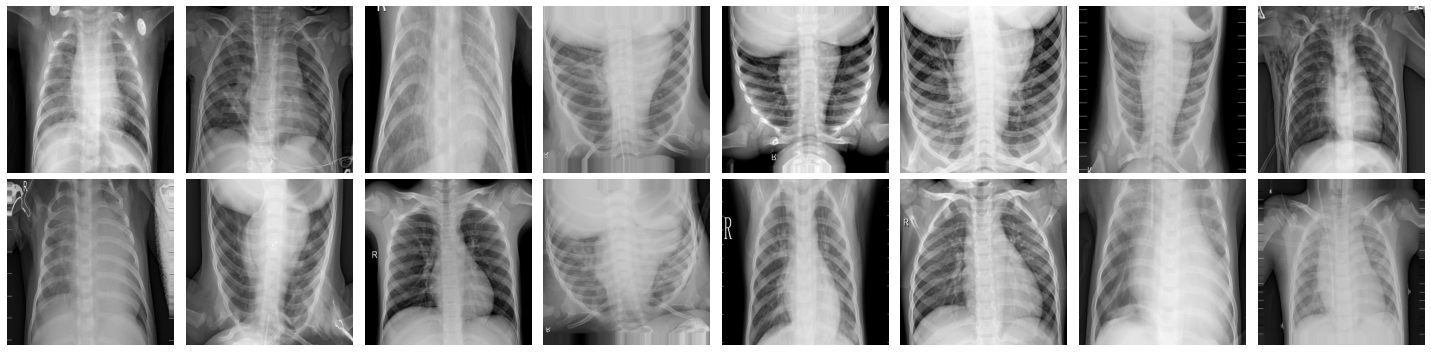

In [ ]:
# Visualizing images in the first training set batch 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img

image_batch_normal=train_set[0][0]
image_batch_opacity=train_set[1][0]
plt.figure(figsize=(20,5))
for i in range(0,8):
    plt.subplot(2,8,i+1)
    pil_img = array_to_img(image_batch_normal[i])
    plt.imshow(pil_img,cmap='gray')
    plt.axis('off')
for i in range(0,8):
    plt.subplot(2,8,i+9)
    pil_img = array_to_img(image_batch_opacity[i])
    plt.imshow(pil_img,cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

The dataset that we have used for the image classification is Chest X-Ray images, which consists of 2 categories, Pneumonia and Opacity(Normal). The data set is organised into 3 folders (train, test, val) and contains subfolders for each image category Opacity(i.e. Pneumonia) & Normal.

The 3rd image in the first row is relatively normal as the lungs are not covered with a white shade.
The 3rd image in the second row is more likely to be pneumonia as the lungs are covered by a white shade.

# **Model Implementation**




CNN architecture is based on layers of convolution. The convolution layers receive input and transform the data from the image and pass it as input to the next layer. 

The transformation is known as the operation of convolution. 

We have defined the number of filters for each convolution layer.These filters detect patterns such as edges, shapes, curves, objects, textures, or even colors. 

We have used Pooling layer together with Convolution layer as well as the goal is to down-sample an input representation (image), decrease its dimensionality by retaining the maximum value (activated features) in the sub regions binding. 

The number of pixels moving across the input matrix is called Stride.The stride is set as 1 to move the filter to 1 pixel at a time.

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = 1, padding = 'Same', 
                 activation ='relu', input_shape = (512, 512, 1)))

model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = 1, padding = 'Same', 
                 activation ='relu', input_shape = (512, 512, 1)))

model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = 1, padding = 'Same', 
                 activation ='relu', input_shape = (512, 512, 1)))

model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())

model.add(Dense(256, activation = "relu"))

model.add(Dropout(0.35))

model.add(Dense(1, activation = "sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 512, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_set, epochs = 15, validation_data = val_set,batch_size=32)

Epoch 1/15
131/131 [==============================] - 1266s 10s/step - loss: 0.4720 - accuracy: 0.7858 - val_loss: 0.1980 - val_accuracy: 0.9365
Epoch 2/15
131/131 [==============================] - 112s 855ms/step - loss: 0.2475 - accuracy: 0.8991 - val_loss: 0.1983 - val_accuracy: 0.9221
Epoch 3/15
131/131 [==============================] - 110s 842ms/step - loss: 0.2120 - accuracy: 0.9139 - val_loss: 0.1463 - val_accuracy: 0.9538
Epoch 4/15
131/131 [==============================] - 113s 861ms/step - loss: 0.1922 - accuracy: 0.9227 - val_loss: 0.1193 - val_accuracy: 0.9615
Epoch 5/15
131/131 [==============================] - 111s 845ms/step - loss: 0.1753 - accuracy: 0.9311 - val_loss: 0.1424 - val_accuracy: 0.9538
Epoch 6/15
131/131 [==============================] - 111s 850ms/step - loss: 0.1575 - accuracy: 0.9365 - val_loss: 0.1375 - val_accuracy: 0.9529
Epoch 7/15
131/131 [==============================] - 112s 855ms/step - loss: 0.1498 - accuracy: 0.9442 - val_loss: 0.1296 - 

# **Plotting the training and validation loss**

### Visualizing the progress of all metrics throughout the total epochs lifetime

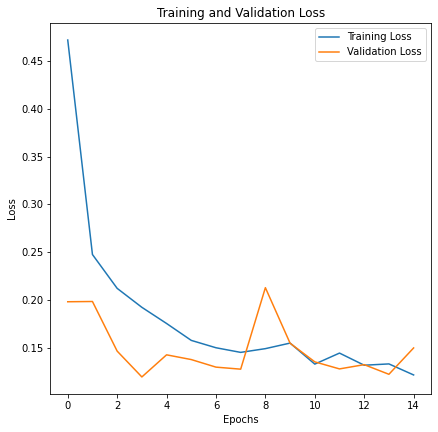

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_value=15
epochs_range = range(epoch_value)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


Interpretation of plot:

X-Axis denotes the number of epochs,we have plotted the graph for 15 epochs

Y-Axis denotes the accuracy

Training loss is greater than validation loss,so our model is not overfitting.

When a model learns signal both curves go down, but when it learns noise a gap is created in the curves. The size of the gap tells you how much noise the model has learned.(kaggle, 2021)

Since the gap between the training and validation loss is low in our plot we can say that the model has learnt more signal than noise.

# **Plotting the training and validation accuracy**

Text(0, 0.5, 'Accuracy')

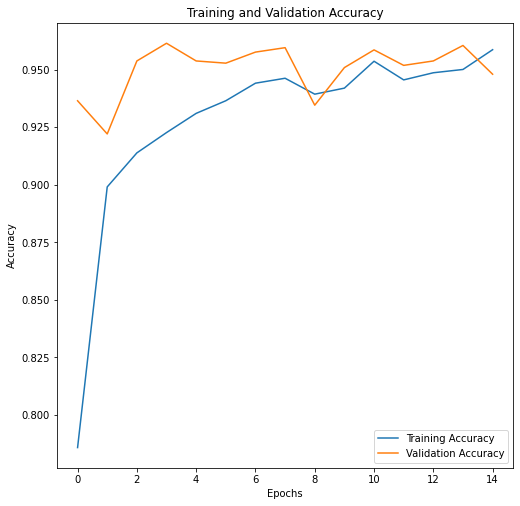

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(epoch_value)

plt.figure(figsize=(18, 18))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Interpretation of plot:

X-Axis denotes the number of epochs,we have plotted the graph for 15 epochs

Y-Axis denotes the accuracy

Validation accuracy is greater than training accuracy,so our model is not overfitting

With the validation accuracy being over 90%, we can infer that the model has been trained appropriately to identify pneumonia affected lungs.

With the Validation accuracy being over 90% we can also infer that the number of false positive or false negatives are under 10%.

In [ ]:
#Displaying the values of accuracy and loss for each epoch
history.history

{'accuracy': [0.7857824563980103,
  0.899093508720398,
  0.9138835668563843,
  0.9227099418640137,
  0.9310591816902161,
  0.9365457892417908,
  0.9441794157028198,
  0.9463263154029846,
  0.9394084215164185,
  0.9420324563980103,
  0.9537213444709778,
  0.9456107020378113,
  0.9487118124961853,
  0.9501431584358215,
  0.958730936050415],
 'loss': [0.4720274806022644,
  0.24745260179042816,
  0.21203064918518066,
  0.1921750009059906,
  0.1752542406320572,
  0.1575457751750946,
  0.14984484016895294,
  0.14499124884605408,
  0.14890722930431366,
  0.15473102033138275,
  0.13272160291671753,
  0.14425697922706604,
  0.13154537975788116,
  0.13292378187179565,
  0.12136567384004593],
 'val_accuracy': [0.9365384578704834,
  0.9221153855323792,
  0.9538461565971375,
  0.9615384340286255,
  0.9538461565971375,
  0.9528846144676208,
  0.9576923251152039,
  0.9596154093742371,
  0.9346153736114502,
  0.9509615302085876,
  0.9586538672447205,
  0.9519230723381042,
  0.9538461565971375,
  0.960

# **Predicting the test dataset**

In [ ]:
preds = model.predict(test_set,verbose=1)

20/20 [==============================] - 123s 6s/step


In [ ]:
#creating a shallow copy,change(a copy) is made only for a particular instance

predictions = preds.copy()


In [ ]:
print(predictions[2])

[0.05347851]


In [ ]:

predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

print(predictions[2])


[0.]


Since the activation function of the last layer is sigmoid, the model gives prediction in the 0 to 1 range and not an exact classification as 0 or 1. 

So we categorise all the values in the 0.5 to 1 range as 1 and less than 0.5 as 0. 

Note(0 denotes a normal case and 1 denotes a case of pneumonia)

# **Plotting the confusion matrix**

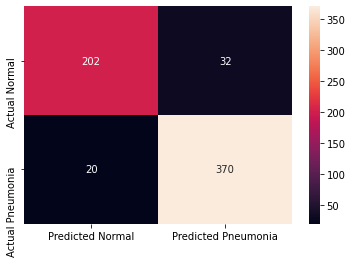

In [ ]:
cm = pd.DataFrame(data=confusion_matrix(test_set.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])

import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

### **Interpreting the output of the confusion matrix**

The upper left (TP - True Positive) denotes the number of images correctly predicted as normal cases

The bottom right (TN - True Negative) denotes the correctly predicted number of images as cases of pneumonia.

As Pneumonia case, the upper right(FP - False Positive) denotes the number of incorrectly predicted images but were actually normal cases and the lower left(FN - False Negative) denotes the number of incorrectly predicted Normal case images but were actually Pneumonia case.